In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/scores.csv')
data

,Method,threshold,params,ROC AUC,PR AUC,F1 score,Accuracy,Precision,Recall,TP,TN,FP,FN,Training time,Inference time
0,DummyClassifier,NaN,"{'random_state': [0], 'strategy': ['stratified']}",0.490519,0.078885,0.066578,0.844222,0.063939,0.069444,25,3774,366,335,1.241020,0.003584
1,Basic LogisticRegression,NaN,"{'random_state': [0], 'max_iter': [3000]}",0.732972,0.199926,0.005464,0.919111,0.166667,0.002778,1,4135,5,359,7.344209,0.025940
2,Basic LogisticRegression [w/thresholding],0.241,"{'random_state': [0], 'max_iter': [3000]}",0.732972,0.199926,0.203866,0.899333,0.277512,0.161111,58,3989,151,302,7.344209,0.008685
3,Basic DecisionTreeClassifier,NaN,{'random_state': [0]},0.521256,0.084428,0.122449,0.847111,0.113208,0.133333,48,3764,376,312,2.529593,0.012918
4,Basic DecisionTreeClassifier [w/thresholding],0.999,{'random_state': [0]},0.521256,0.084428,0.122449,0.847111,0.113208,0.133333,48,3764,376,312,2.529593,0.006264
5,Basic KNeighborsClassifier,NaN,{},0.541067,0.088950,0.010309,0.914667,0.071429,0.005556,2,4114,26,358,0.258407,6.854248
6,Basic KNeighborsClassifier [w/thresholding],0.389,{},0.541067,0.088950,0.100840,0.881111,0.127660,0.083333,30,3935,205,330,0.258407,3.331389
7,Basic RandomForestClassifier,NaN,{'random_state': [0]},0.686125,0.170760,0.000000,0.920000,0.000000,0.000000,0,4140,0,360,2.784127,0.142599
8,Basic RandomForestClassifier [w/thresholding],0.680,{'random_state': [0]},0.686125,0.170760,0.000000,0.920000,0.000000,0.000000,0,4140,0,360,2.784127,0.075645
9,Basic XGBClassifier,NaN,"{'seed': [0], 'objective': ['binary:logistic']...",0.713682,0.214494,0.111650,0.918667,0.442308,0.063889,23,4111,29,337,9.182019,0.034857


## Les modèles sans aucun ajustement

In [3]:
basic = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('Basic')) ][['Method','ROC AUC', 'F1 score','Recall']]
basic

,Method,ROC AUC,F1 score,Recall
1,Basic LogisticRegression,0.732972,0.005464,0.002778
3,Basic DecisionTreeClassifier,0.521256,0.122449,0.133333
5,Basic KNeighborsClassifier,0.541067,0.010309,0.005556
7,Basic RandomForestClassifier,0.686125,0.000000,0.000000
9,Basic XGBClassifier,0.713682,0.111650,0.063889


## Les modèles avec un `seuillage`

In [4]:
basic_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Basic')) ][['Method','ROC AUC', 'F1 score','Recall']]
basic_t

,Method,ROC AUC,F1 score,Recall
2,Basic LogisticRegression [w/thresholding],0.732972,0.203866,0.161111
4,Basic DecisionTreeClassifier [w/thresholding],0.521256,0.122449,0.133333
6,Basic KNeighborsClassifier [w/thresholding],0.541067,0.100840,0.083333
8,Basic RandomForestClassifier [w/thresholding],0.686125,0.000000,0.000000
10,Basic XGBClassifier [w/thresholding],0.713682,0.072351,0.038889


## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `seuillage`

In [5]:
grid = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('Grid')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
grid_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Grid')) ][['Method', 'ROC AUC', 'F1 score', 'Recall']]
grid

,Method,ROC AUC,F1 score,Recall
11,Grid LogisticRegression,0.733814,0.0,0.0
13,Grid DecisionTreeClassifier,0.641568,0.0,0.0
15,Grid RandomForestClassifier,0.714838,0.0,0.0
17,Grid XGBClassifier,0.722834,0.0,0.0
19,Grid KNeighborsClassifier,0.605833,0.0,0.0


## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `seuillage` + `class_weight='balanced'` 

In [6]:
balanced = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('Balanced')) & ~(data.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Recall']]
balanced_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('Balanced')) & ~(data.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Recall']]
balanced_t

,Method,ROC AUC,F1 score,Recall
22,Balanced LogisticRegression [w/thresholding],0.730879,0.228700,0.708333
24,Balanced DecisionTreeClassifier [w/thresholding],0.679716,0.232193,0.575000
26,Balanced RandomForestClassifier [w/thresholding],0.703471,0.207424,0.752778
28,Balanced XGBClassifier [w/thresholding],0.722080,0.180033,0.916667


In [7]:
smot = data[ ~(data.Method.str.contains('threshold')) & (data.Method.str.contains('SMOT')) & ~(data.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Recall']]
smot_t = data[ (data.Method.str.contains('threshold')) & (data.Method.str.contains('SMOT')) & ~(data.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Recall']]
smot_t

,Method,ROC AUC,F1 score,Recall
30,SMOT LogisticRegression [w/thresholding],0.722641,0.218013,0.783333
32,SMOT DecisionTreeClassifier [w/thresholding],0.613174,0.190037,0.572222
34,SMOT KNeighborsClassifier [w/thresholding],0.612190,0.177719,0.744444
36,SMOT RandomForestClassifier [w/thresholding],0.688516,0.000000,0.000000
38,SMOT XGBClassifier [w/thresholding],0.656779,0.016304,0.008333


## Comparaison graphique des même modèles

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def plot_scores( data_tmp, title="" ):

    fig = plt.figure(figsize=(20,5))
    data_tmp = data_tmp.copy()
    
    plt.suptitle(f"Comparaison des scores pour les {title}")
    
    #data_tmp['Method'] = data_tmp['Method'].apply(lambda x: str(x).rjust(100,'-').upper())
    
    labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
    if( data_tmp.shape[0] == 4):
        labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

    ax1 = plt.subplot(1,3,1)
    sns.barplot(data=data_tmp, y='Method', x='ROC AUC')
    plt.xlim([0, 1])
    plt.title("ROC AUC")
    ax1.bar_label(ax1.containers[0])
    ax1.set_yticklabels(labels)

    ax2 = plt.subplot(1,3,2)
    sns.barplot(data=data_tmp, y='Method', x='F1 score')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("F1 score")
    ax2.axes.yaxis.set_visible(False)
    ax2.bar_label(ax2.containers[0])

    ax3 = plt.subplot(1,3,3)
    sns.barplot(data=data_tmp, y='Method', x='Recall')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("Recall")
    ax3.axes.yaxis.set_visible(False)
    ax3.bar_label(ax3.containers[0])

    fig.tight_layout()

    plt.show()

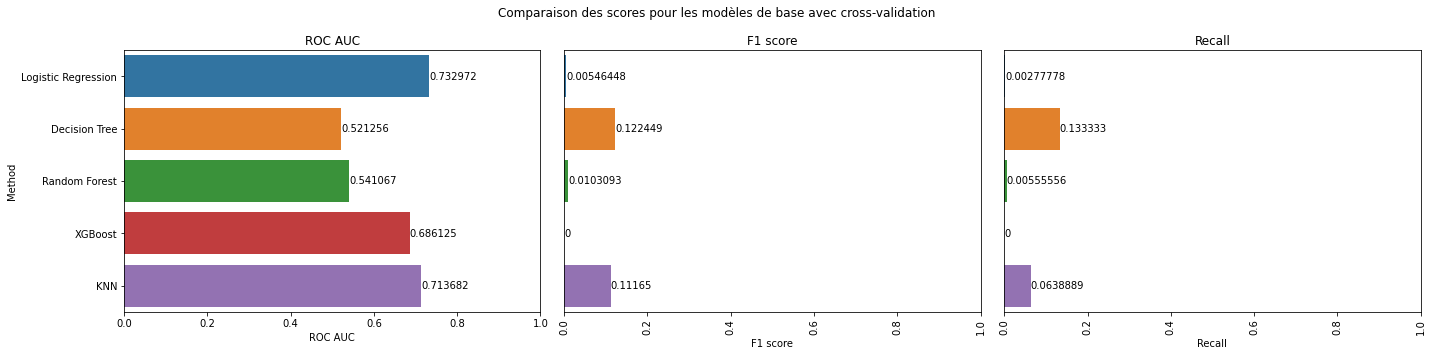

In [11]:
plot_scores( basic, "modèles de base avec cross-validation")

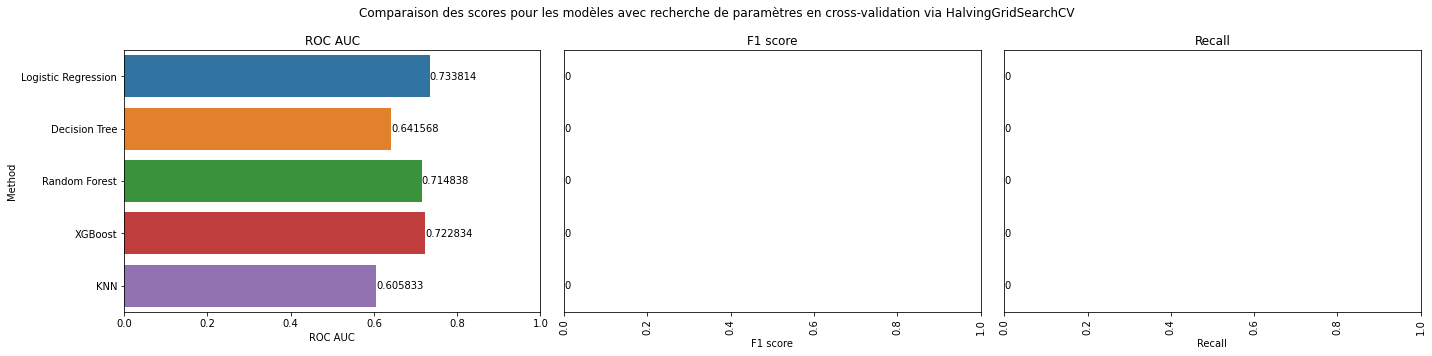

In [12]:
plot_scores( grid, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV" )

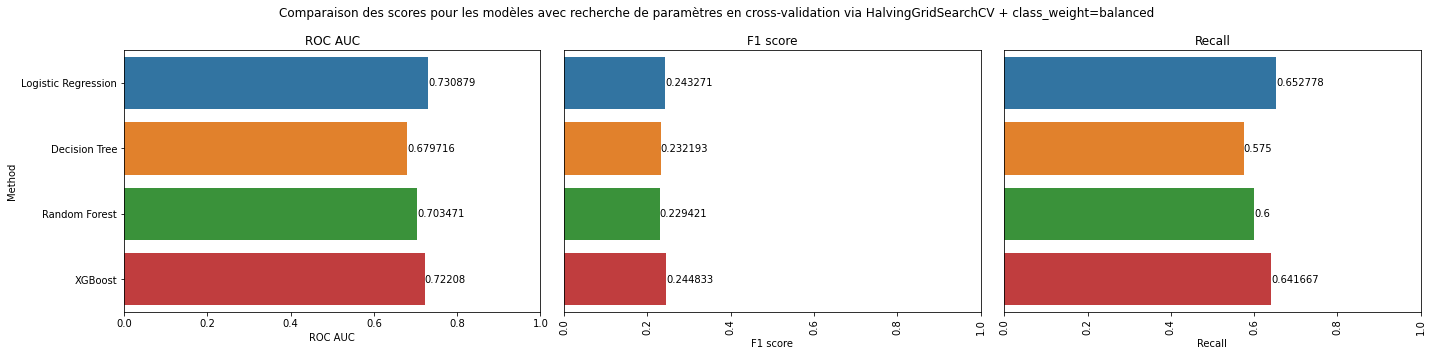

In [13]:
plot_scores( balanced, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced" )

# Les mêmes avec seuillage sur F1

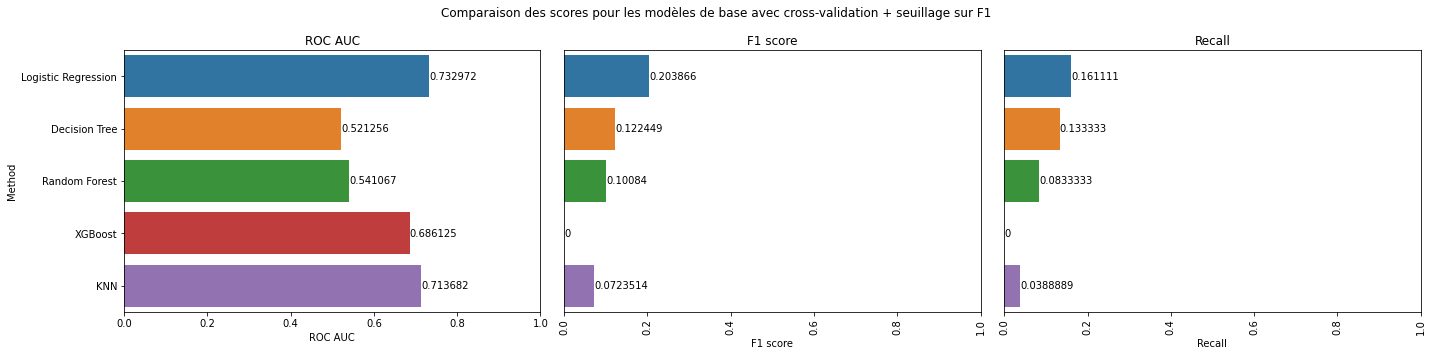

In [15]:
plot_scores( basic_t, "modèles de base avec cross-validation + seuillage sur F1")

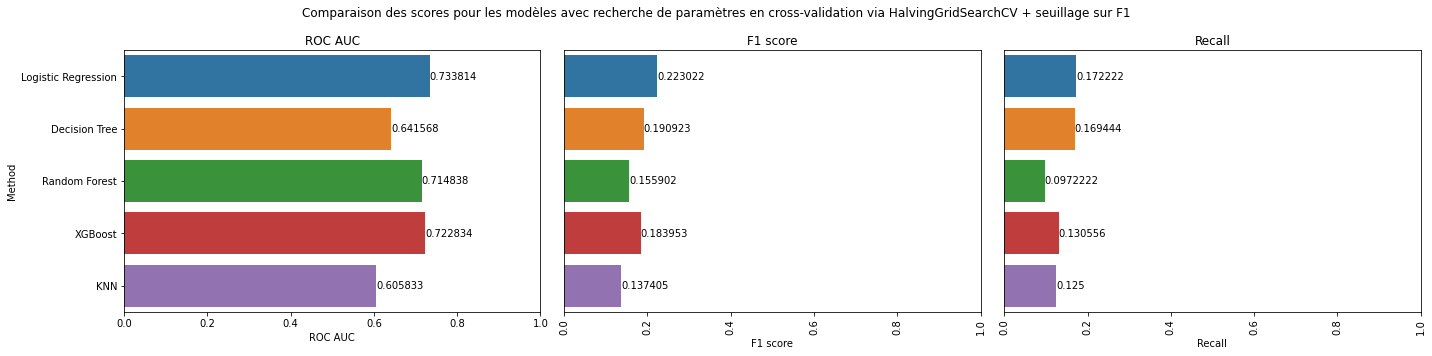

In [16]:
plot_scores( grid_t, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + seuillage sur F1" )

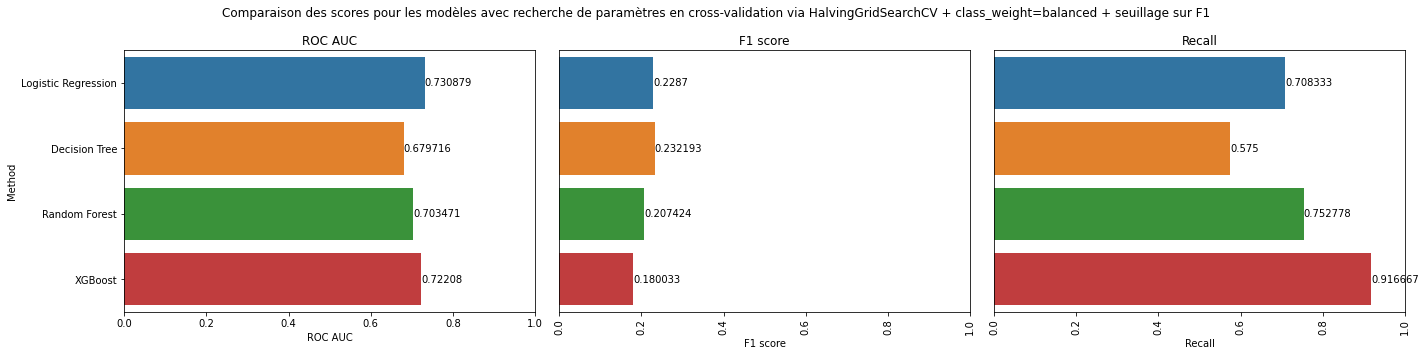

In [17]:
plot_scores( balanced_t, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced + seuillage sur F1" )